<a href="https://colab.research.google.com/github/MrigeeshAshwin/EdgeDetection/blob/main/EdgeDetectionSST1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


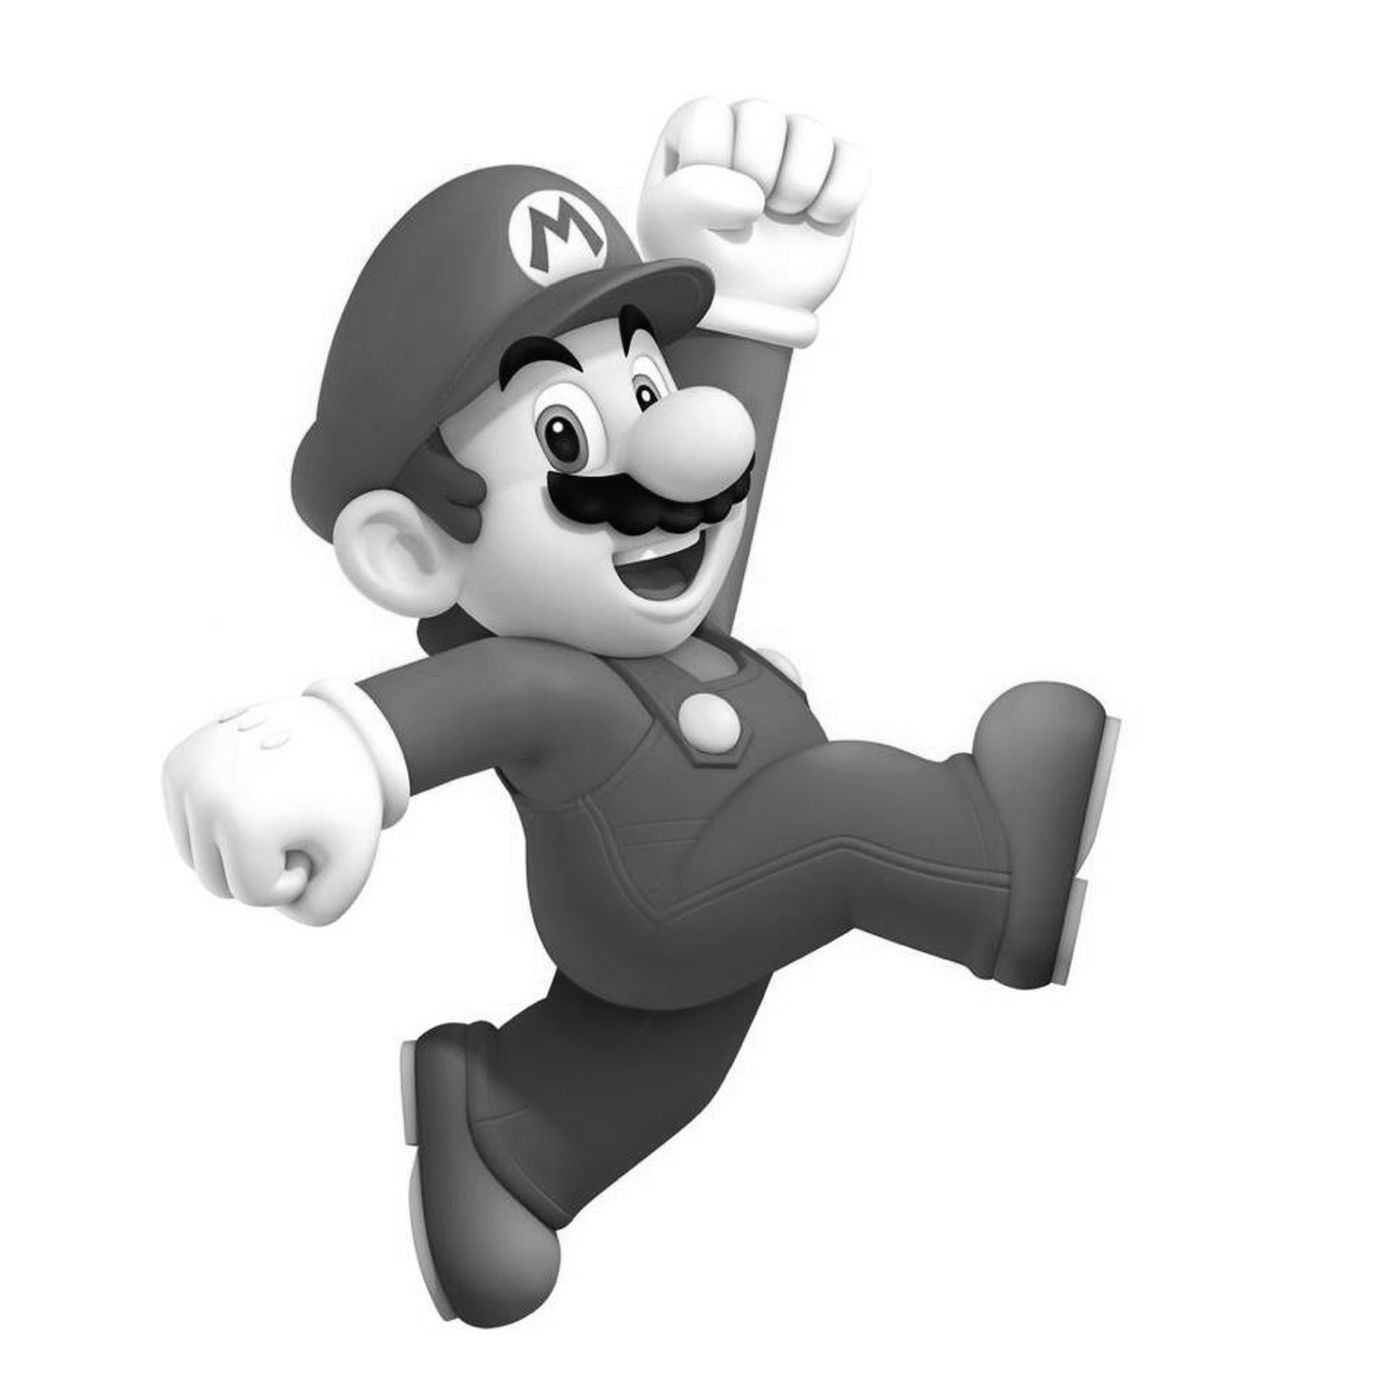

In [11]:
cpy=image=cv2.imread(r'/content/mario.jpg',0)
nx=image.shape[0]
ny=image.shape[1]
cv2_imshow(image)

In [8]:
#filter
sobelx=np.array([[-0.125,0,0.125],
                 [-0.25,0,0.25],
                 [-0.125,0,0.125]])
sobely=np.array([[-0.125,-0.25,-0.125],
                 [0,0,0],
                 [0.125,0.25,0.125]])
#blur
gaussianblur=np.array([[0.0625,0.125,0.0625],
                       [0.125,0.25,0.125],
                       [0.0625,0.125,0.0625]])

Applying sobelx and sobely and calculating the magnitude of the gradient


In [15]:
#convulation
def convolve(image,nx,ny,filter1,filter2,f):
  x_start=0
  nx=nx-f+1
  ny=ny-f+1
  z=np.zeros((nx,ny))
  for i in range(nx):
    x_stop=x_start+f
    y_start=0
    for j in range(ny):
        y_stop=y_start+f
        slice_image=image[y_start:y_stop,x_start:x_stop]
        z[j,i]=np.sqrt((np.sum(slice_image*filter1))**2+(np.sum(slice_image*filter2))**2)

        y_start=y_start+1
    x_start=x_start+1
  return z

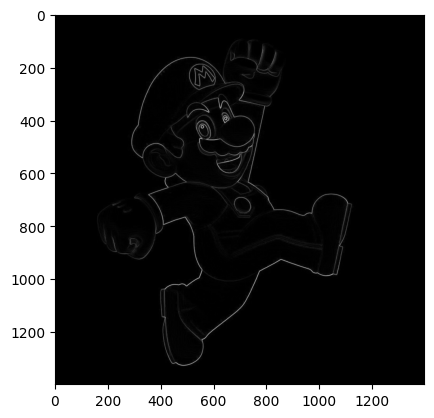

In [22]:
z1=convolve(image,nx,ny,sobelx,sobely,3)
plt.imshow(z1,cmap='gray')